In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
url = 'youtube_US_short.csv' 
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845 entries, 0 to 12844
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                12845 non-null  object
 1   trending_date           12845 non-null  object
 2   title                   12845 non-null  object
 3   channel_title           12845 non-null  object
 4   category_id             12845 non-null  int64 
 5   publish_time            12845 non-null  object
 6   tags                    12845 non-null  object
 7   views                   12845 non-null  int64 
 8   likes                   12845 non-null  int64 
 9   dislikes                12845 non-null  int64 
 10  comment_count           12845 non-null  int64 
 11  thumbnail_link          12845 non-null  object
 12  comments_disabled       12845 non-null  bool  
 13  ratings_disabled        12845 non-null  bool  
 14  video_error_or_removed  12845 non-null  bool  
 15  de

Q1

In [13]:
max_views= data.sort_values('views', ascending= False)
max_views[['title','views','publish_time']].head(1)

,title,views,publish_time
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,2017-12-06T17:58:51.000Z


In [15]:
max_chan= data.sort_values('views', ascending= False)
max_chan[['channel_title','views']].head(3)

,channel_title,views
6181,YouTube Spotlight,149376127
5935,YouTube Spotlight,137843120
5699,YouTube Spotlight,125432237


In [21]:
new_df= data[['likes','dislikes','views','comment_count']]
new_df.corr(method= 'pearson')

,likes,dislikes,views,comment_count
likes,1.000000,0.483108,0.882560,0.697198
dislikes,0.483108,1.000000,0.575063,0.867073
views,0.882560,0.575063,1.000000,0.637888
comment_count,0.697198,0.867073,0.637888,1.000000


<AxesSubplot:>

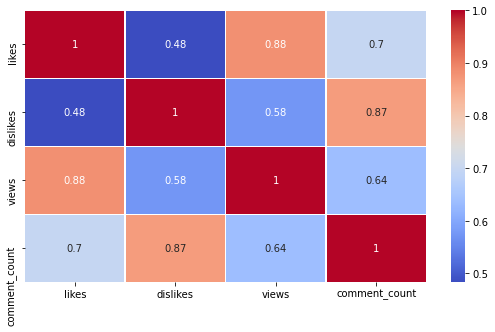

In [24]:
plt.figure(figsize=(9,5))
sns.heatmap(new_df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

<AxesSubplot:xlabel='comment_count', ylabel='dislikes'>

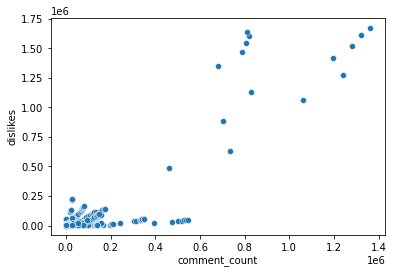

In [34]:
##fig, axes = plt.subplots(figsize=(10,5), ncols=2)
sns.scatterplot(data= new_df, x='comment_count', y='dislikes')
##new_df.plot.scatter(x='comment_count', y='dislikes')
##sns.regplot(data= new_df, x='comment_count', y='dislikes')

In [48]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['year'] = pd.DatetimeIndex(data['publish_time']).year
grouped_df= data.loc[(data['year'] == 2017) | (data['year'] == 2018)]
grouped_df.groupby('year')[['likes']].mean().reset_index()

,category_id,views
0,1,1009534450
1,2,86900867
2,10,5344552275
3,15,176875195
4,17,442903515
5,19,61874890
6,20,134531087
7,22,769675204
8,23,1327929119
9,24,4694934150
